<a href="https://colab.research.google.com/github/CodeCraftIA/Autoencoders_PCA-/blob/main/Ergasia3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Νευρωνικά Δίκτυα  ,  3η Εργασία - Autoencoders - PCA

Φωρτώνω την mnist κάνω τις κατάλληλες τροποποιήσεις στα δεδομένα , ετοιμάζω ένα νέο dataset το οποίο έχει ακριβώς τους επόμενουσ αριθμούς σε σχέση με το x_train και x_test

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

#making the next values randomly
import random
num_array = [np.array(x_train[np.where(y_train == i)[0]]) for i in range(0,10)]
x_trainNext = np.zeros((60000, 784))
y_trainNext=np.zeros((60000,1))
for i,y in enumerate(y_train):
  if(y!=9):
    x_trainNext[i] = random.choice(num_array[y+1])
    y_trainNext[i]=y+1
  else:
    x_trainNext[i] = random.choice(num_array[0])
    y_trainNext[i]=0
x_testNext = np.zeros((10000, 784))
y_testNext=np.zeros((10000,1))
for i,y in enumerate(y_test):
  if(y!=9):
    x_testNext[i] = random.choice(num_array[y+1])
    y_testNext[i]=y+1
  else:
    x_testNext[i] = random.choice(num_array[0])
    y_testNext[i]=0

11490434/11490434 [==============================] - 0s 0us/step


Χρησιμοποιώ το MLP της 1ης εργασίας , θα το χρησιμοποιήσω στις επανακατασκευασμένες εικόνες και θα συγκρίνω τα αποτελέσματα του Autoencoder με του PCA

In [ ]:
def MLP3layer():
  # convert to one-hot vector
  y_train2 = keras.utils.to_categorical(y_train)
  y_test2 = keras.utils.to_categorical(y_test)
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(256, input_dim=784))
  model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.Dropout(0.45))
  model.add(keras.layers.Dense(256))
  model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.Dropout(0.45))
  model.add(keras.layers.Dense(10))
  model.add(keras.layers.Activation('softmax'))
  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

  model.fit(x_train, y_train2, epochs=20, batch_size=128,validation_data=(x_test, y_test2))
  return model
res = MLP3layer()

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4262 - accuracy: 0.8687 - val_loss: 0.1474 - val_accuracy: 0.9537
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1944 - accuracy: 0.9416 - val_loss: 0.1072 - val_accuracy: 0.9670
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1510 - accuracy: 0.9544 - val_loss: 0.0915 - val_accuracy: 0.9709
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1297 - accuracy: 0.9617 - val_loss: 0.0787 - val_accuracy: 0.9750
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1141 - accuracy: 0.9643 - val_loss: 0.0736 - val_accuracy: 0.9768
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1028 - accuracy: 0.9689 - val_loss: 0.0706 - val_accuracy: 0.9792
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0948 - accuracy: 0.9705 - val_loss: 0.0684 - val_accuracy: 0.9795
Epoch 

In [ ]:
# Απλός Autoencoder με 1 input layer 1 layer στο encode layer και 1 στο decode layer
#είτε δέχεται το ίδιο το dataset είτε τα επόμενα όπως ορίστηκαν πάνω
def My_Autoencoder1(x_train2,x_test2):
  # Define the model
  input_dim = 28*28
  encoding_dim = 32

  input_layer = keras.layers.Input(shape=(input_dim,))
  encoder = keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
  decoder = keras.layers.Dense(input_dim, activation='sigmoid')(encoder)

  autoencoder = keras.Model(input_layer, decoder)

  # Compile the model
  autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

  # Train the model
  autoencoder.fit(x_train, x_train2, epochs=10, batch_size=64, validation_data=(x_test, x_test2))

  # decode some test images

  reconstructed_images = autoencoder.predict(x_test)
  return reconstructed_images

#Κάνω plot κάποια στοιχεία από την είσοδο και την έξοδο
def My_Plot(decoded_imgs):
  import matplotlib.pyplot as plt
  n = 10
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # εικόνες εισόδου
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # εικόνες εξόδου
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(decoded_imgs[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()


# 3 layers στον encoder , 3 layers στον decoder
def My_Autoencoder2(x_train2,x_test2):
  # Build the autoencoder model
  inputs = keras.layers.Input(shape=(784,))
  x = keras.layers.Dense(64, activation='relu')(inputs)
  x = keras.layers.Dense(32, activation='relu')(x)
  encoded = keras.layers.Dense(16, activation='relu')(x)

  # The encoded image has shape (None, 16)

  x = keras.layers.Dense(32, activation='relu')(encoded)
  x = keras.layers.Dense(64, activation='relu')(x)
  decoded = keras.layers.Dense(784, activation='sigmoid')(x)

  # The decoded image has the same shape as the input image

  # Create the autoencoder model
  autoencoder = keras.models.Model(inputs, decoded)

  # Compile the model
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

  # Train the model
  autoencoder.fit(x_train, x_train2, epochs=10, batch_size=128, validation_data=(x_test, x_test2))

  # Use the model to reconstruct an image


  reconstructed_images = autoencoder.predict(x_test)
  return reconstructed_images


**AUutoencoder για ανακατασκευή του επόμενου ψηφίου**

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2630 - val_loss: 0.2446
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2427 - val_loss: 0.2403
Epoch 3/10
938/938 [==============================] - 9s 9ms/step - loss: 0.2388 - val_loss: 0.2372
Epoch 4/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2362 - val_loss: 0.2353
Epoch 5/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2346 - val_loss: 0.2341
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2336 - val_loss: 0.2333
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2327 - val_loss: 0.2324
Epoch 8/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2319 - val_loss: 0.2319
Epoch 9/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2312 - val_loss: 0.2315
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


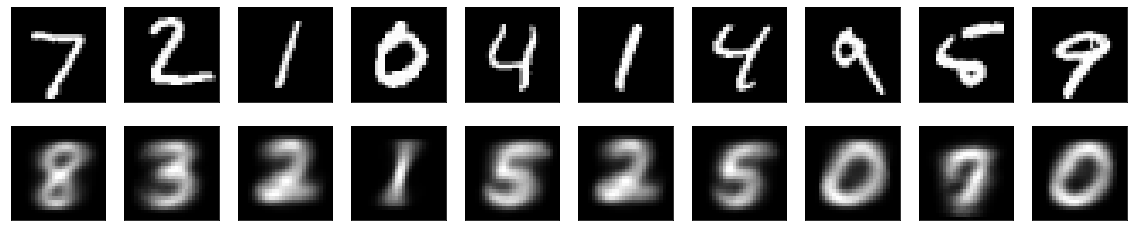

In [ ]:
reconIm=My_Autoencoder1(x_trainNext,x_testNext)
My_Plot(reconIm)

In [ ]:
predictions=res.predict(reconIm)
print(accuracy_score(y_testNext,np.argmax(predictions, axis=1)))

313/313 [==============================] - 1s 3ms/step
0.7435


Ο MLP τις 1ης εργασίας μπορεί να αναγνωρίσει σωστά μόνο το 74.34% των  ανακατασκευασμένων εικόνων(επόμενου ψηφίου) που παράγει ο απλός autoencoder

Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.2753 - val_loss: 0.2444
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2376 - val_loss: 0.2335
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2313 - val_loss: 0.2305
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2292 - val_loss: 0.2291
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2279 - val_loss: 0.2285
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2270 - val_loss: 0.2280
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2264 - val_loss: 0.2277
Epoch 8/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2259 - val_loss: 0.2270
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2255 - val_loss: 0.2270
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


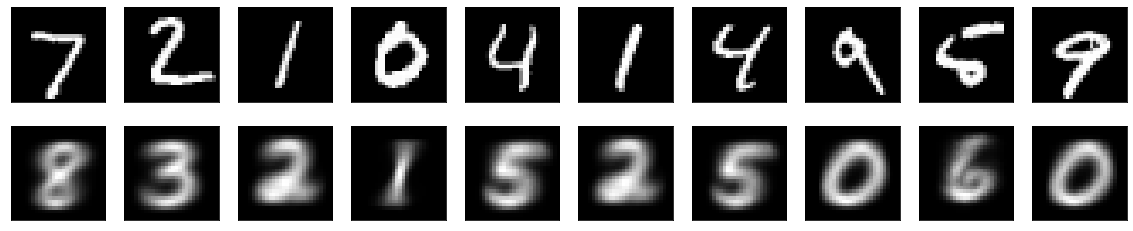

In [ ]:
reconIm=My_Autoencoder2(x_trainNext,x_testNext)
My_Plot(reconIm)

In [ ]:
predictions=res.predict(reconIm)
print(accuracy_score(y_testNext,np.argmax(predictions, axis=1)))

313/313 [==============================] - 1s 3ms/step
0.8718


με τον πιό σύνθετο autoencoder φτάνουμε στο 87.2%

**Autoencoder για ανακατασκευή του ίδιου ψηφίου** (το κάνω για να μπορέσω να συγκρίνω με τον PCA στον οποίο μπόρεσα να ανακατασκευάσω μόνο ίδιου ψηφίου)

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.1903 - val_loss: 0.1316
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1179 - val_loss: 0.1059
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1022 - val_loss: 0.0970
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0968 - val_loss: 0.0942
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0951 - val_loss: 0.0933
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0944 - val_loss: 0.0928
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0941 - val_loss: 0.0925
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0939 - val_loss: 0.0925
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0937 - val_loss: 0.0922
Epoch 10/10
313/313 [==============================] - 0s 955us/step


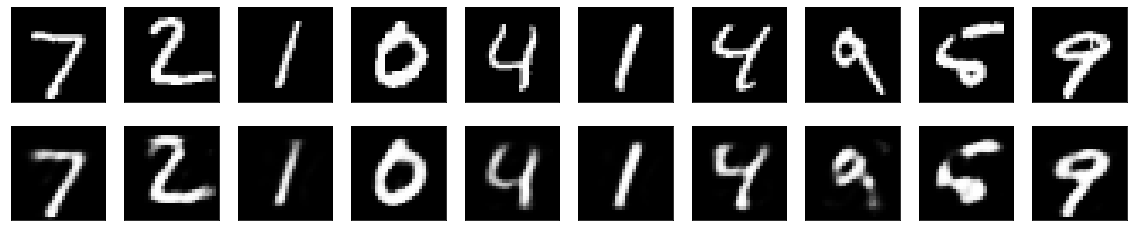

313/313 [==============================] - 0s 1ms/step
0.9678


In [ ]:
reconIm=My_Autoencoder1(x_train,x_test)
My_Plot(reconIm)
predictions=res.predict(reconIm)
print(accuracy_score(y_test,np.argmax(predictions, axis=1)))

ο απλός παράγει εικόνες οι οποίες κατά 96.78% μπορούν να αναγνωριστούν μέσω του MLP

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.2310 - val_loss: 0.1711
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1603 - val_loss: 0.1503
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1451 - val_loss: 0.1392
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1379 - val_loss: 0.1338
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1335 - val_loss: 0.1303
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1306 - val_loss: 0.1278
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1284 - val_loss: 0.1257
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1265 - val_loss: 0.1239
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1248 - val_loss: 0.1225
Epoch 10/10
313/313 [==============================] - 0s 1ms/step


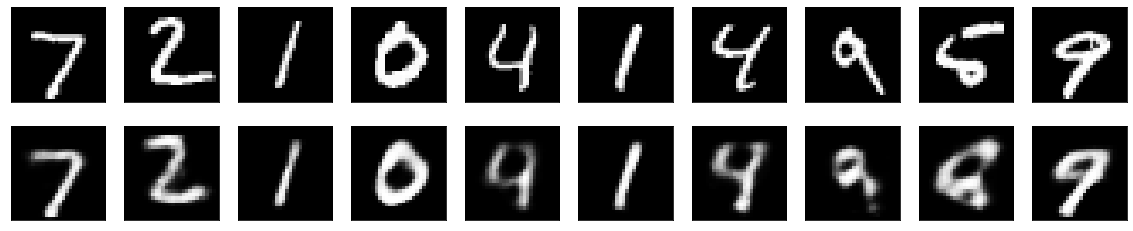

313/313 [==============================] - 0s 1ms/step
0.9212


In [ ]:
reconIm=My_Autoencoder2(x_train,x_test)
My_Plot(reconIm)
predictions=res.predict(reconIm)
print(accuracy_score(y_test,np.argmax(predictions, axis=1)))

Παρατηρούμε πως ο πιο σύνθετος autoencoder ενω τα πήγε καλύτερα στην κατασκευή του επόμενου ψηφίου , στην ανακατασκευή του ίδιου παράγει χειρότερα αποτελέσματα 92.1% σε σύγκριση με τον απλό

In [ ]:
#συνάρτηση η οποία δέχετε το πλήθος των features που θα κρατήσει και επιστρέφει μέσω PCA τις νέες ανακατασκευασμένες εικόνες
def My_PCA(n):
  import numpy as np
  from sklearn.decomposition import PCA

  # Perform PCA
  pca = PCA(n_components=n)
  X_pca = pca.fit_transform(x_test)

  # Reconstruct the images using the first n components
  X_reconstructed = pca.inverse_transform(X_pca)

  # Reshape the reconstructed images back into a 28x28 array
  img_reconstructed = [X_reconstructed[i].reshape(28, 28) for i in range(0,10000)]
  return img_reconstructed


PCA κρατώντας ΜΟΝΟ τα πρώτα 150 features

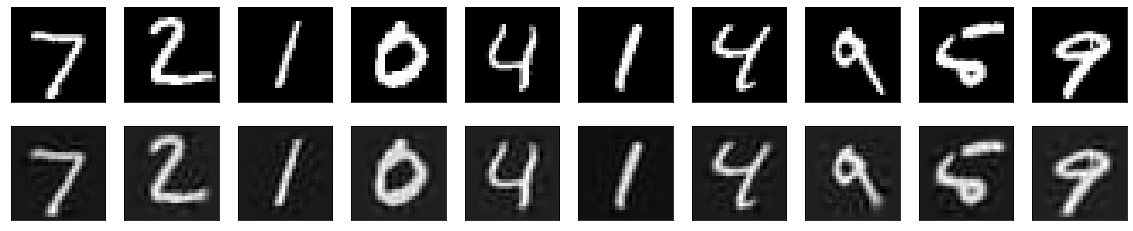

313/313 [==============================] - 0s 1ms/step
0.9824


In [ ]:
pca=My_PCA(150)
My_Plot(pca)
predictions=res.predict(np.array(pca).reshape(-1, 28*28))
print(accuracy_score(y_test,np.argmax(predictions, axis=1)))

O MLP αναγνωρίζει το 98.24% (σχεδόν ίδιο ποσοστό με τις αρχικές εικόνες )

PCA κρατώντας ΜΟΝΟ τα πρώτα 50 features

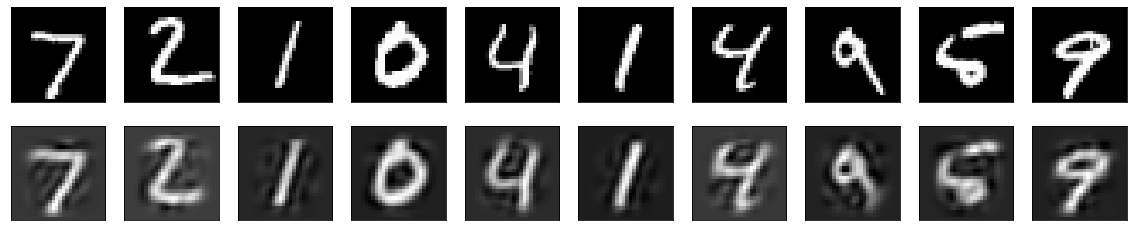

313/313 [==============================] - 0s 1ms/step
0.9772


In [ ]:
pca=My_PCA(50)
My_Plot(pca)
predictions=res.predict(np.array(pca).reshape(-1, 28*28))
print(accuracy_score(y_test,np.argmax(predictions, axis=1)))

PCA κρατώντας ΜΟΝΟ τα πρώτα 15 features

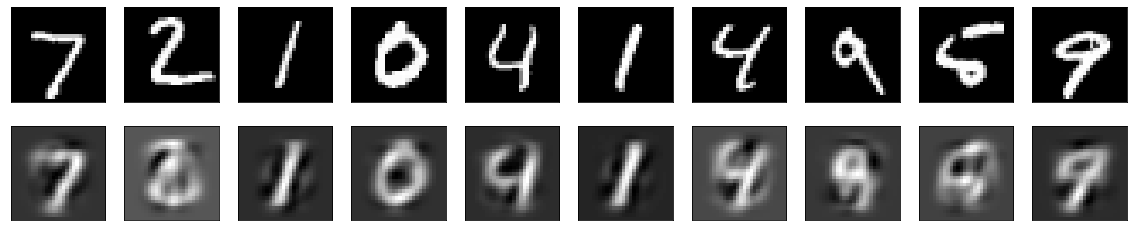

313/313 [==============================] - 0s 1ms/step
0.8842


In [ ]:
pca=My_PCA(15)
My_Plot(pca)
predictions=res.predict(np.array(pca).reshape(-1, 28*28))
print(accuracy_score(y_test,np.argmax(predictions, axis=1)))

PCA κρατώντας ΜΟΝΟ τα πρώτα 10 features

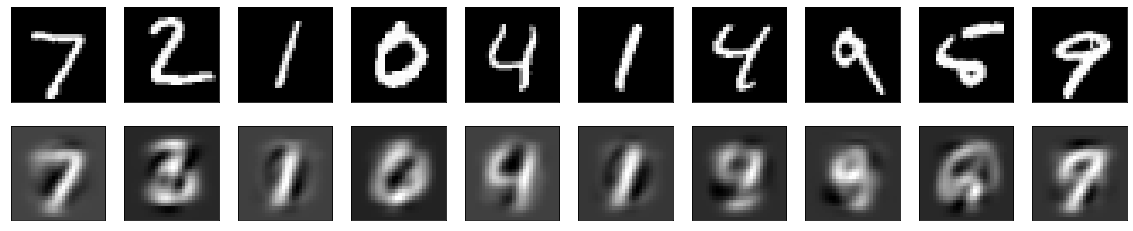

313/313 [==============================] - 0s 2ms/step
0.8007


In [ ]:
pca=My_PCA(10)
My_Plot(pca)
predictions=res.predict(np.array(pca).reshape(-1, 28*28))
print(accuracy_score(y_test,np.argmax(predictions, axis=1)))

Με 10 μόλις features ο PCA παράγει εικόνες τις οποίες ο MLP αναγνωρίζει κατά 80%

PCA κρατώντας ΜΟΝΟ τα πρώτα 5 features

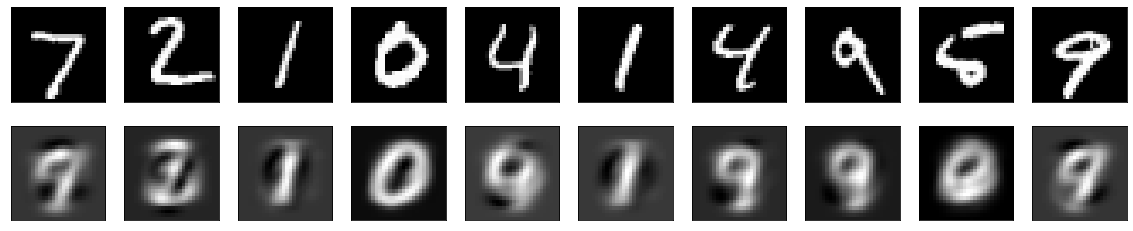

313/313 [==============================] - 0s 1ms/step
0.5301


In [ ]:
pca=My_PCA(5)
My_Plot(pca)
predictions=res.predict(np.array(pca).reshape(-1, 28*28))
print(accuracy_score(y_test,np.argmax(predictions, axis=1)))

με 5 μόνο features η απόδοση πέφτει απότομα στα 53%

**ΣΧΟΛΙΑ - ΠΑΡΑΤΗΡΗΣΕΙΣ**

Αρχικά όπως είδαμε παραπάνω ο απλός autoencoder τα πήγε πολύ καλά στο να ανακατασκευάσει την ίδια την εικόνα (οι ανακατασκευασμένες εικόνες αναγνωρίστηκαν κατα 97% απο το MLP) , ενώ δεν τα πήγε καλά στην ανακατασκευή του επόμενου ψηφίου (74%) . Ανίθετα ο πιο σύνθετος autoencoder , τα πήγε καλύτερα στην ανακατασκευή του επόμενου ψηφίου 87% και χειρότερα στην ανακατασκευή του ίδιου 92% σε σύγκριση με τον απλό .
Απο την άλλη ο PCA παρατήρησα πως είτε χρεισιμοποιώ όλα τα features είτε 150 η ακρίβεια είναι σχεδόν ίδια (98-98.5%) . Σε σύγκριση με τον autoencoder είναι καλύτερος μέχρι και για 50 features 97.7 , για 15 πέφτει κάτω απο 90% για 10 φτάνει το 80% ενω με 5 μόλις 53% ακρίβεια .